# Linear Regression with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### By Yukta Vishwakarma


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### *Loading data and exploratory data analysis*

In [66]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### From above we can see that there is only two features are available.
#### 1. Hours
#### 2. Scores

In [67]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### From above we can say that:
#### 1. total no of data points are 25

In [68]:
X_val=data.iloc[:,:-1]
X_val

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [69]:
Y_val=data.iloc[:,1]
Y_val

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [70]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

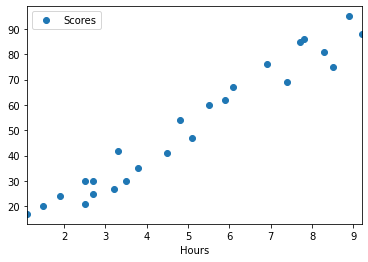

In [71]:
data.plot(x="Hours",y="Scores",style='o')

H:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


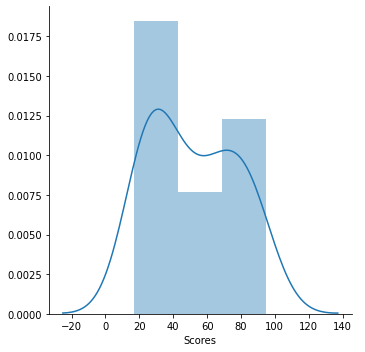

In [72]:
sns.FacetGrid(data, size=5) \
   .map(sns.distplot, "Scores") \
   .add_legend();
plt.show();

#### We can see that Scores are distributed within a range approx 20 to 90

#### For the training of data , Spliting dataset into test and training part. where 70% data used for training data and 30% data is used for testing purpose. 

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### *Training Model*

In [82]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### *Ploting Predictive Line*

In [83]:
# Plotting the regression line
#line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
#plt.scatter(X, Y)
#plt.plot(X, line);
#plt.show()
#ploting via matplotlib library

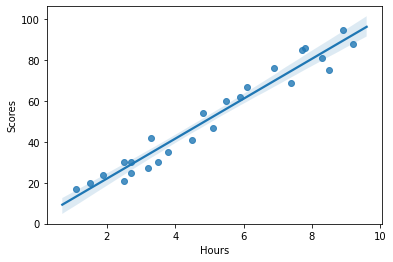

In [84]:
sns.regplot(x="Hours", y="Scores", data=data);

#### ploting Via Seaborn library

### *Prediction*

In [85]:
y_pred = regressor.predict(x_test)
print(x_test)
print(y_pred)

[[4.5]
 [1.1]
 [3.2]
 [2.7]
 [1.9]]
[46.60940191 13.10434848 33.79864619 28.87143245 20.98789047]


In [86]:
prediction_result=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_result

,Actual,Predicted
0,41,46.609402
1,17,13.104348
2,27,33.798646
3,30,28.871432
4,24,20.987890


In [87]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours = np.array([9.25])
hours=hours.reshape(1,-1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.41793243405623


### *Evaluating the model*

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [88]:
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print("Root Mean Square Error:",(np.sqrt(mean_squared_error(y_test, y_pred))))


Mean Absolute Error: 4.088875339899158
Root Mean Square Error: 4.543336859425289
